#### use pcolormash to create mosaic like grids to visualize data
#### plot time series to wet-bulb temperature using pcolormash (x: date, and y: year)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### read csv data
 - Create DatetimeIndex by DataFrame.set_index in order to use 'resample'
 - resample hourly data to daily data

In [12]:
flnm_i = '/glade/campaign/mmm/c3we/mingge/wetbulb/HEAT/DATA/twb.csv'
dir_o  = '/glade/campaign/mmm/c3we/mingge/wetbulb/PLOT/'

df_h = pd.read_csv(flnm_i, index_col = 0)

# Create DatetimeIndex by DataFrame.set_index
# in order to use 'resample'
df_h.index = pd.to_datetime(df_h.index)

# resample hourly data to daily data
df_dmax = df_h.resample('D').max()
df_dmin = df_h.resample('D').min()
df_davg = df_h.resample('D').mean()

year_1d = df_h.index.year

year_s = year_1d[0]
year_e = year_1d[-1]
n_year = year_e - year_s + 1
print((year_s),'-', (year_e))

1979 - 2020


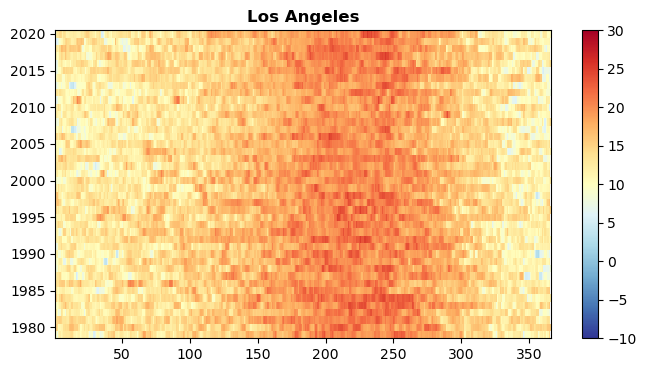

In [10]:
n_366 = 366
arr_2d = np.empty((n_year, n_366))
arr_2d[:] = np.nan

# the outputs of meshgrid are of shape (N, M) for ‘xy’ indexing and (M, N) for ‘ij’ indexing.
# default 'xy' indexing
day_2d, year_2d = np.meshgrid(range(1, n_366+1), range(year_s, year_e+1))
#print(year_2d.shape)    

for city in df_dmax.columns:
     
    data = {'year':pd.DatetimeIndex(df_dmax.index).year,
            city: df_dmax[city]}
    df_new = pd.DataFrame(data)
    
    for year in range(year_s, year_e+1):
        iTT = np.isin(df_new.year, year)
        # by adding [0] in id_iTT, convert tuple -> numpy.ndarray
        id_iTT = np.where(iTT == True)[0] 
         
        arr_2d[year-year_s, :len(id_iTT)] = df_new[city][id_iTT]
        
    fig, ax = plt.subplots(figsize=(8, 4)) 
     
    # the pcolormesh() method to create a pseudocolor plot with a non-regular rectangular grid.
    im=ax.pcolormesh(day_2d, year_2d, arr_2d, vmin=-10, vmax=30,  cmap= 'RdYlBu_r')
    fig.colorbar(im, ax=ax)
    ax.set_title(city, fontweight ="bold")
    
    plt.savefig('twb_' + city + '.pdf', format='pdf', dpi=300);
    break

/glade/campaign/mmm/c3we/mingge/wetbulb/PLOT/twb_Los Angeles.pdf
/glade/campaign/mmm/c3we/mingge/wetbulb/PLOT/twb_Mexico City.pdf
/glade/campaign/mmm/c3we/mingge/wetbulb/PLOT/twb_London.pdf
/glade/campaign/mmm/c3we/mingge/wetbulb/PLOT/twb_Paris.pdf
/glade/campaign/mmm/c3we/mingge/wetbulb/PLOT/twb_Cairo.pdf
/glade/campaign/mmm/c3we/mingge/wetbulb/PLOT/twb_Sharm EL-Sheikh.pdf
/glade/campaign/mmm/c3we/mingge/wetbulb/PLOT/twb_Dubai.pdf
/glade/campaign/mmm/c3we/mingge/wetbulb/PLOT/twb_Manila.pdf
/glade/campaign/mmm/c3we/mingge/wetbulb/PLOT/twb_Sydney.pdf


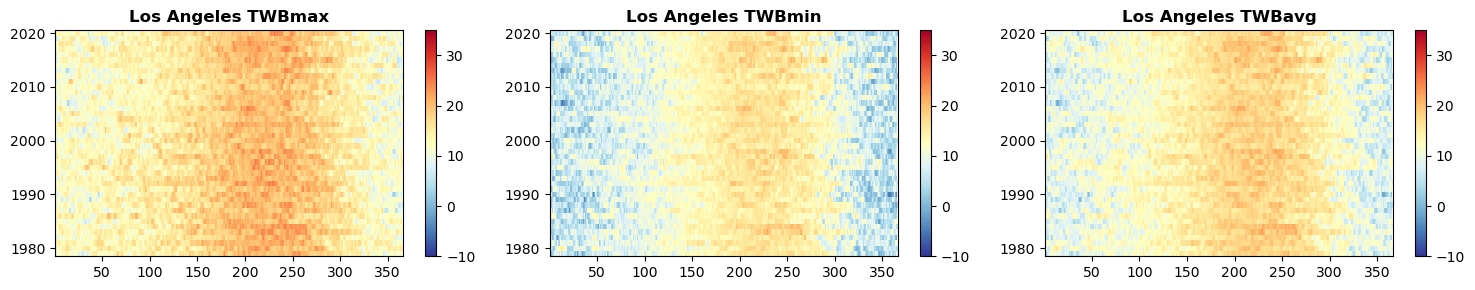

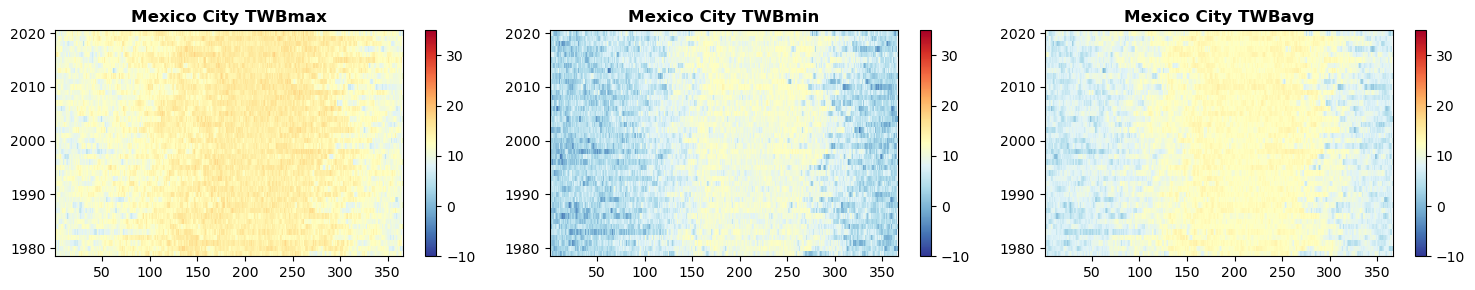

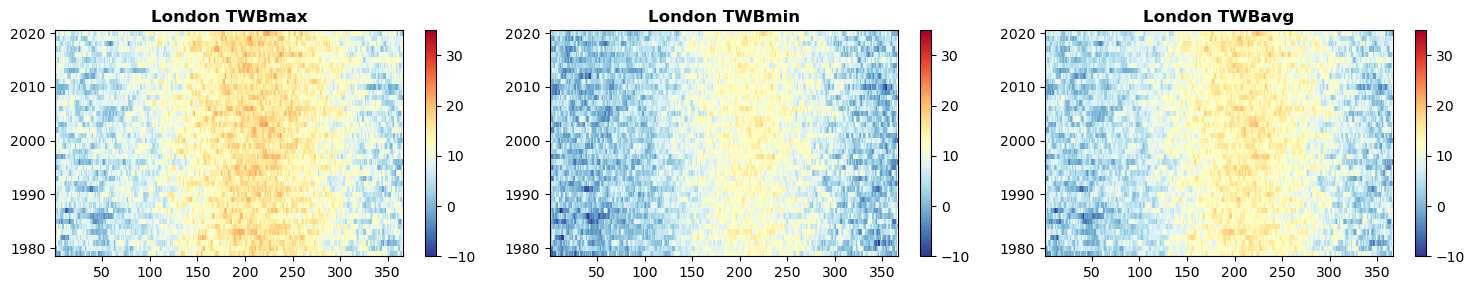

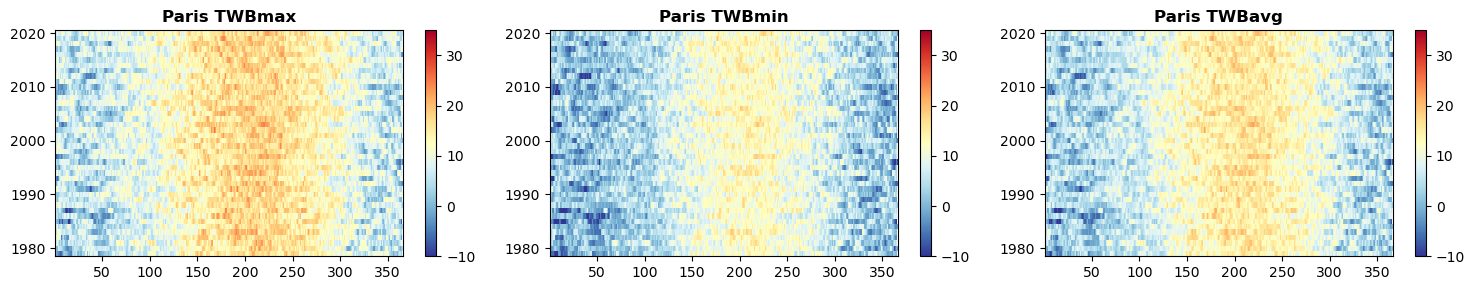

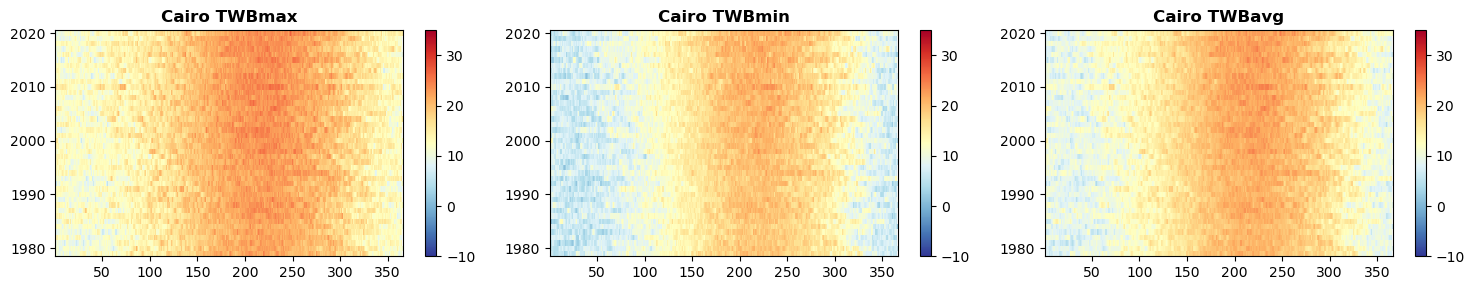

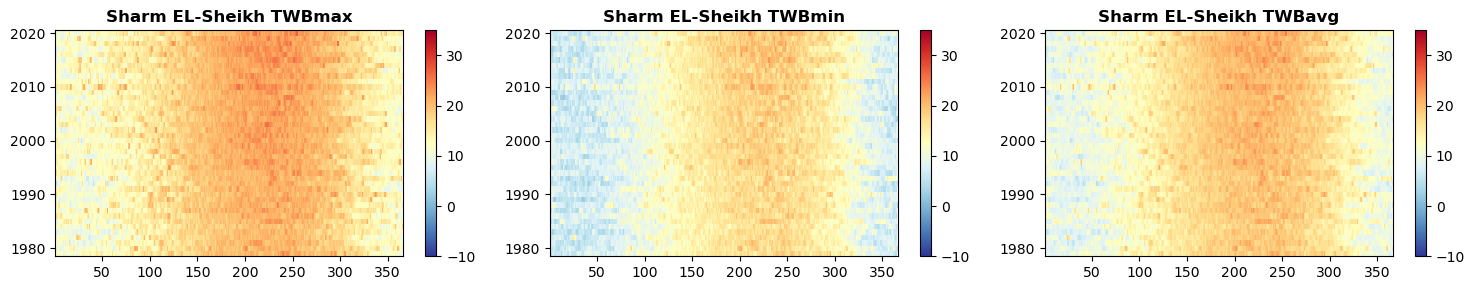

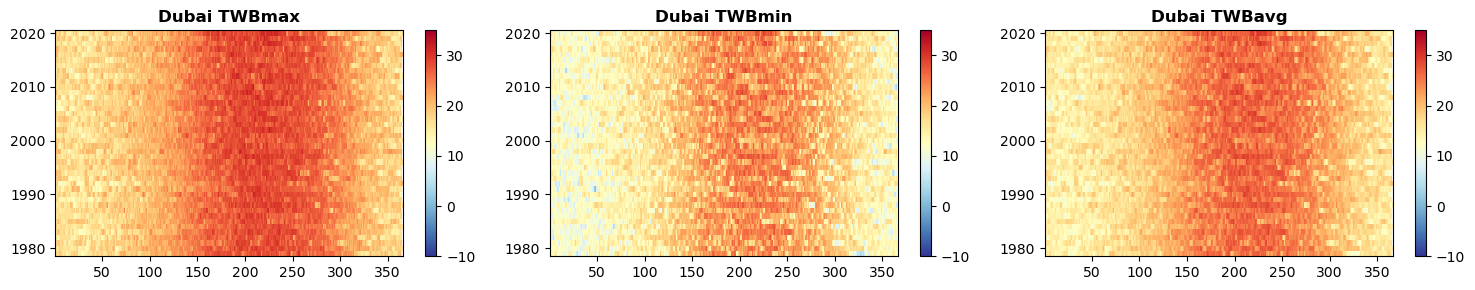

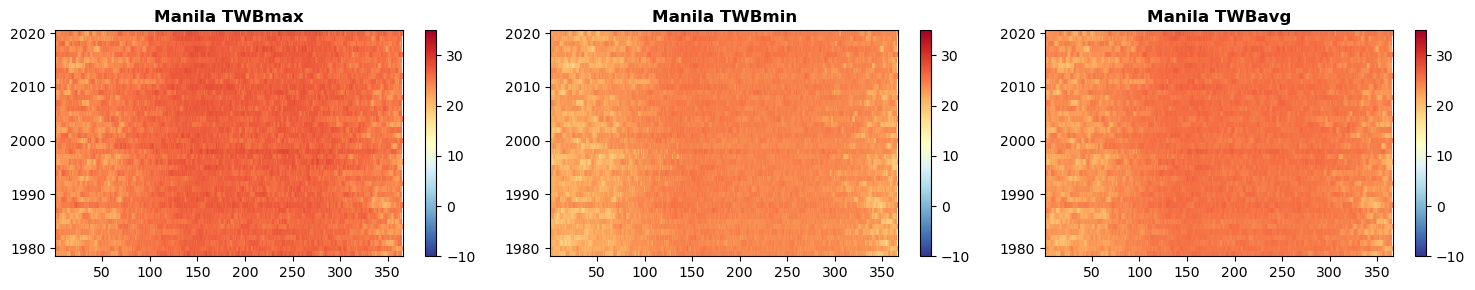

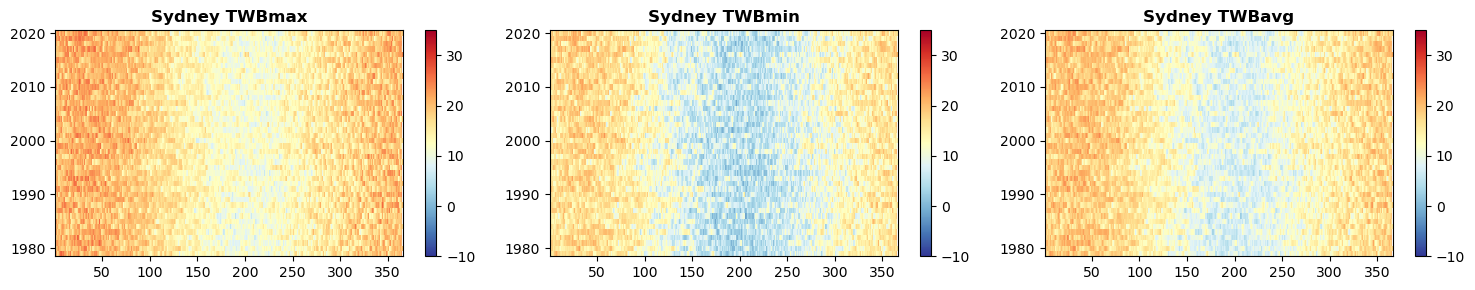

In [16]:
n_366 = 366
arr_2d = np.empty((n_year, n_366))
arr_2d[:] = np.nan

# the outputs of meshgrid are of shape (N, M) for ‘xy’ indexing and (M, N) for ‘ij’ indexing.
# default 'xy' indexing
day_2d, year_2d = np.meshgrid(range(1, n_366+1), range(year_s, year_e+1))
#print(year_2d.shape)    
title_s = [' TWBmax', ' TWBmin',' TWBavg']

for city in df_dmax.columns:
    fig, ax = plt.subplots(1,3,figsize=(15, 3)) 
    
    for nn in range(3):
        if nn == 0:
            data = {'year':pd.DatetimeIndex(df_dmax.index).year,
            city: df_dmax[city]}
        elif nn == 1:
            data = {'year':pd.DatetimeIndex(df_dmin.index).year,
            city: df_dmin[city]}
        else:
            data = {'year':pd.DatetimeIndex(df_davg.index).year,
            city: df_davg[city]}
            
        df_new = pd.DataFrame(data)
    
        for year in range(year_s, year_e+1):
            iTT = np.isin(df_new.year, year)
            # by adding [0] in id_iTT, convert tuple -> numpy.ndarray
            id_iTT = np.where(iTT == True)[0] 
         
            arr_2d[year-year_s, :len(id_iTT)] = df_new[city][id_iTT]
        
     
        # the pcolormesh() method to create a pseudocolor plot with a non-regular rectangular grid.
        im=ax[nn].pcolormesh(day_2d, year_2d, arr_2d, vmin=-10, vmax=35,  cmap= 'RdYlBu_r')
        fig.colorbar(im, ax=ax[nn])
        ax[nn].set_title(city + title_s[nn], fontweight ="bold")
        
    plt.tight_layout()
    
    flnm_p = dir_o + 'twb_' + city + '.pdf'
    print(flnm_p)
    plt.savefig(flnm_p, format='pdf', dpi=300);